In [30]:
import numpy as np
import yt
import yt.units as u
import matplotlib.pyplot as plt
import os

In [2]:
from scipy.ndimage.filters import gaussian_filter
from scipy.integrate import simps
from scipy.integrate import cumtrapz
from scipy import interpolate
from scipy import stats
import os
import argparse, sys

In [91]:
def dmdt(raw):
    e, dm = raw[0], raw[1]
    e, dm = e[dm != 0], dm[dm != 0]
    de = e[1] - e[0]
    dm_de = dm / de
    s_dm_de = gaussian_filter(dm_de, 20, mode='wrap')
    slog_dm_de = np.log10(s_dm_de)
    M_bh = 7e7 * u.Msun
    G = u.gravitational_constant
    yr = u.yr
    M_sun = u.Msun
    e_bound = e[np.where(e < 0.)] * u.erg / u.gram
    D = 188 * u.Mpc
    t = (2. * np.pi * G * M_bh / ((2 * np.abs(e_bound))**(3. / 2))).in_units('day')
    de_dt = (1. / 3) * ((2. * np.pi * G * M_bh)**(2. / 3)) * t**(-5. / 3)
    dm_de_bound = s_dm_de[np.where(e < 0.)] * u.g / (u.erg / u.g)
    dm_de_bound_orig = dm_de[np.where(e < 0.)] * u.g / (u.erg / u.g)
    mdot = (dm_de_bound * de_dt * 0.1 * u.c**2 / np.pi / 4 / D**2).in_units('erg/s/cm**2')
    mdot_orig = (dm_de_bound_orig * de_dt * 0.1 * u.c**2 / np.pi / 4 / D**2).in_units('erg/s/cm**2')

    # plot unsmoothed
    plt.scatter(t, mdot_orig)
    plt.scatter(t, mdot)
    #plt.xscale('log')
    plt.yscale('log')

In [96]:
raw1 = np.loadtxt('../../TDE_plot/b10000_ev_bhbound_histogram_multitidal_hdf5_chk_0055.dat')
#raw2 = np.loadtxt('../../TDE_plot/b10000_ev_bhbound_histogram_multitidal_hdf5_chk_0060.dat')

(1e-12, 2e-10)

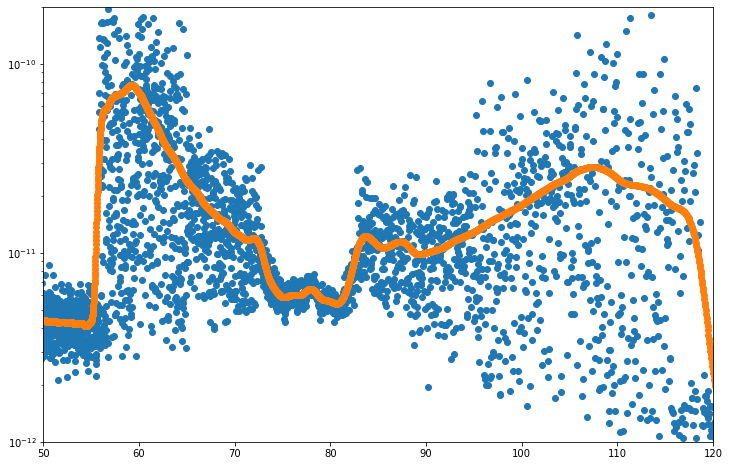

In [97]:
plt.figure(figsize=(12, 8))
dmdt(raw1)
plt.xlim([50, 120])
plt.ylim([1e-12, 2e-10])